# Segmentation

An essential processing step in **TRamWAy** consists of dividing the space and time support of the localization microscopy data into time segments and microdomains so as to resolve the dynamics at these different locations in space and time.

The individual molecule locations or displacements are assigned to these segments/microdomains.
While the simplest models of the dynamics will independently apply to each spatio-temporal microdomain,
others will introduce global regularization terms, *e.g.* smoothing priors, or compute spatial and/or temporal variations, *e.g.* gradients or derivatives,
which requires the corresponding inference procedures to jointly apply to all the microdomains simultaneously.

Here, the terms *microdomain*, *cell* and *bin* are used interchangeably.

This notebook focuses on the `RWAnalyzer` class and its `tesseller`, `time` and `sampler` attributes,
together with the modules of same names.
All of these symbols are exported by the `tramway.analyzer` package.

The `tesseller` and `time` attributes drive the spatial and temporal segmentations respectively, while the `sampler` attribute articulates the two segmentations and assigns molecule locations to the different microdomains.

As a result, to demonstrate the `tesseller` or `time` features, the `sample` method of the `sampler` attribute is called anyway.

In [1]:
from tramway.analyzer import *
import numpy as np

In [2]:
from src.segmentation import set_notebook_theme
set_notebook_theme()

from matplotlib import pyplot as plt

In [3]:
from src.segmentation import preset_analyzer, preset_analyzers

## Tessellating

An instanced `RWAnalyzer` object features a `tesseller` attribute that can be set using any initializer provided by the `tramway.analyzer.tesseller` module:

In [4]:
a = RWAnalyzer()

a.tesseller = tesseller.TessellerPlugin('grid')

Alternatively, the `tessellers` module (also exported by the `tramway.analyzer` package) exports more convenient wrappers:

In [5]:
a = RWAnalyzer()

a.tesseller = tessellers.Squares

`tessellers.Squares` is equivalent to `tesseller.from_plugin('grid')` and both rely on the `tramway.tessellation.grid` module, but the default parameters for the wrappers may differ from the original «plugin»'s defaults.

### Standard methods

Most methods feature a `resolution` attribute that allows to size the spatial bin.
These methods are illustrated with and without this attribute explicitly set:

* [Square grid](#square-grid)
* [Hexagonal grid](#hexagonal-grid)
* [*k*-means](#k-means)
* [GWR](#gwr)
* [*k*-d tree](#k-d-tree)
* [Random mesh](#random)

Beware the name *resolution* may be misleading, as the `resolution` attribute actually reflects the desired size of the spatial bins, instead of the density of bins per space unit. To increase the resolution, the bin size should be decreased, so as the value for the `resolution` attribute, hence the possible confusion.

#### Square grid

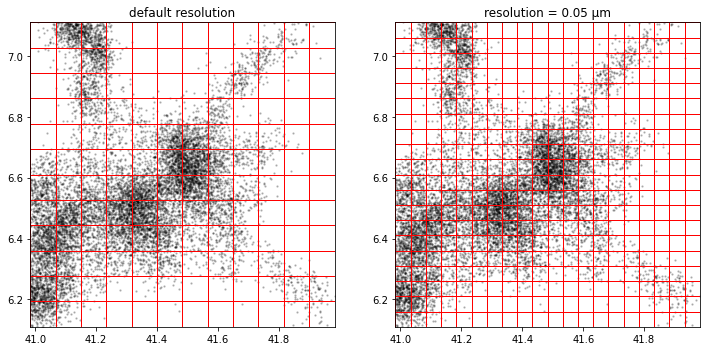

In [6]:
a, b, translocations = preset_analyzers(2)

# first analyzer with default parameters (left figure)
a.tesseller = tessellers.Squares

# second analyzer with explicitly set attribute `resolution` (right figure)
b.tesseller = tessellers.Squares
b.tesseller.resolution = .05

assignment_a = a.sampler.sample(translocations)
assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='default resolution')
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='resolution = 0.05 µm')

#### Hexagonal grid

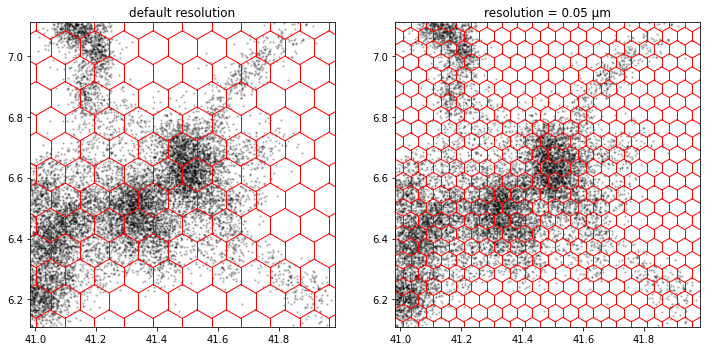

In [7]:
a, b, translocations = preset_analyzers(2)

# first analyzer with default parameters (left figure)
a.tesseller = tessellers.Hexagons

# second analyzer with explicitly set attribute `resolution` (right figure)
b.tesseller = tessellers.Hexagons
b.tesseller.resolution = .05

assignment_a = a.sampler.sample(translocations)
assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='default resolution')
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='resolution = 0.05 µm')

#### *k*-means

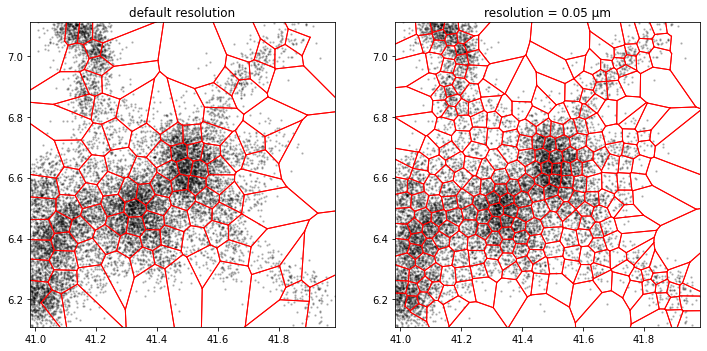

In [8]:
a, b, translocations = preset_analyzers(2)

# first analyzer with default parameters (left figure)
a.tesseller = tessellers.KMeans

# second analyzer with explicitly set attribute `resolution` (right figure)
b.tesseller = tessellers.KMeans
b.tesseller.resolution = .05

assignment_a = a.sampler.sample(translocations)
assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='default resolution')
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='resolution = 0.05 µm')

#### GWR

While the *Growing-When-Required* method is adaptive similarly to the *k-means* method, it is the only available method in **TRamWAy** that can fit the local average displacement length in addition to the local density.
Basically, it fits the displacement length wherever the density is high and, at the same time, exhibits more flexibility in low-density areas, making this method a good candidate for heterogeneously dense data.

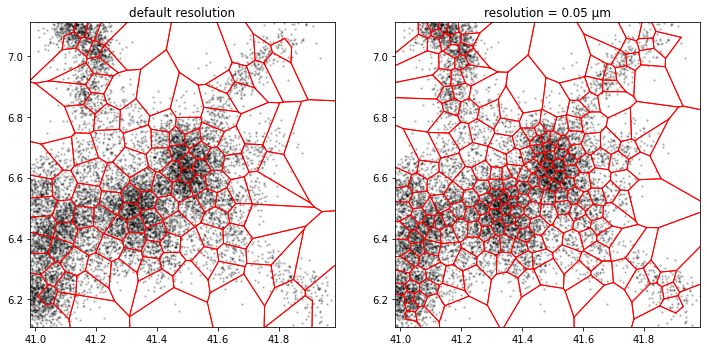

In [9]:
a, b, translocations = preset_analyzers(2)

# first analyzer with default parameters (left figure)
a.tesseller = tessellers.GWR

# second analyzer with explicitly set attribute `resolution` (right figure)
b.tesseller = tessellers.GWR
b.tesseller.resolution = .05

assignment_a = a.sampler.sample(translocations)
assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='default resolution')
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='resolution = 0.05 µm')

### Other methods

Some tessellation methods are not available as wrappers, but as *plugins* instead.

#### *k*-d tree

This method inherits from the quad-tree algorithm in **InferenceMAP**.
It does not rely on the Euclidean distance to partition the space.

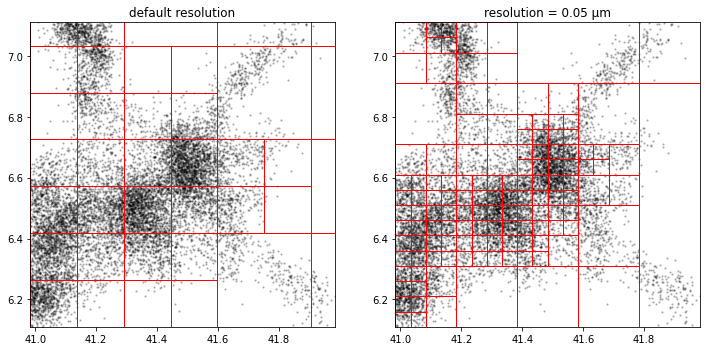

In [10]:
a, b, translocations = preset_analyzers(2)

# first analyzer with default parameters (left figure)
a.tesseller = tesseller.TessellerPlugin('kdtree')

# second analyzer with explicitly set attribute `resolution` (right figure)
b.tesseller = tesseller.TessellerPlugin('kdtree')
b.tesseller.resolution = .05

assignment_a = a.sampler.sample(translocations)
assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='default resolution')
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='resolution = 0.05 µm')

#### Random

Random microdomain centers can be sampled from the location data.

The number of microdomains can be controlled with the `avg_probability` attribute that is basically the inverse of the desired number of microdomains.

The `resolution` attribute currently does not apply.

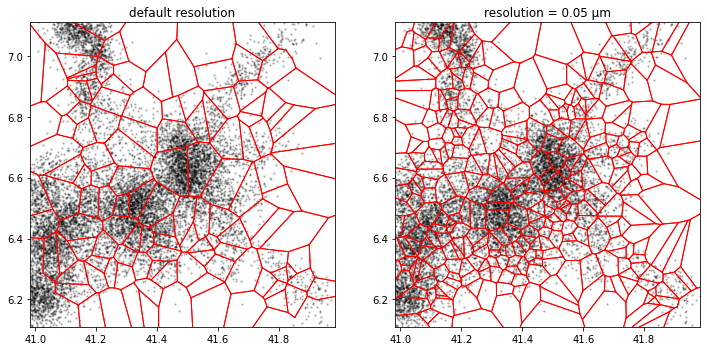

In [11]:
a, b, translocations = preset_analyzers(2)

# first analyzer with default parameters (left figure)
a.tesseller = tesseller.TessellerPlugin('random')

# second analyzer with explicitly set attribute `resolution` (right figure)
b.tesseller = tesseller.TessellerPlugin('random')
b.tesseller.avg_probability = 2e-3

assignment_a = a.sampler.sample(translocations)
assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='default resolution')
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='resolution = 0.05 µm')

### Merging microdomains

For microdomains with too few assigned locations, on the basis of a Voronoi-based partition, microdomains can be merged.

For example, if we reuse our default random mesh and merge the microdomains (or *cells*) with less than 20 locations:

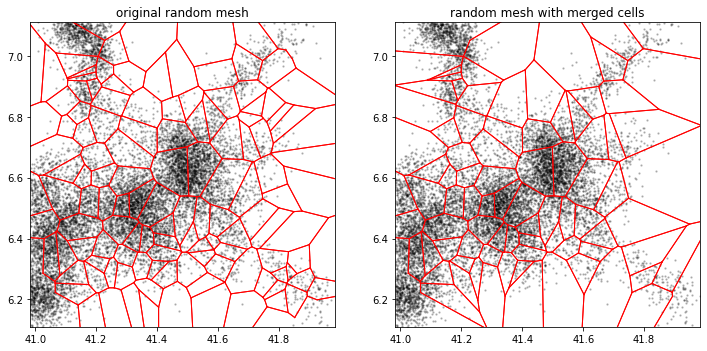

In [12]:
# right figure
c = preset_analyzer()

c.tesseller = tesseller.TessellerPlugin('random')

c.tesseller.post_processing = cell_mergers.ByTranslocationCount
c.tesseller.post_processing.count_threshold = 20
c.tesseller.post_processing.update_centroids = True

assignment_c = c.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='original random mesh')
c.tesseller.mpl.plot(assignment_c, axes=axes[1], title='random mesh with merged cells')

## Time windowing

Time segments can be defined using the `time` attribute.

As for all such attributes, a similarly-named module is exported by `tramway.analyzer`, with a series of constructors.
In the case of the `time` attribute, the main constructor defines a sliding time window:

In [13]:
a, translocations = preset_analyzer(True)

a.time = time.SlidingWindow(duration=60) # in s

An overlap between successive time segments can be introduced defining a shift less than the window duration:

In [14]:
a.time.window_shift = 30 # in s

If the `time` attribute is not explicitly set, the `sample` method simply skips the time segmentation.

In any case, the attribute exposes several methods to handle the `Partition` object returned by `sampler.sample()`.

In [15]:
assignment = a.sampler.sample(translocations)

a.time.n_time_segments(assignment)

25

In [16]:
import pandas as pd
pd.set_option('display.max_rows', 6)

t0s, t1s, counts = [], [], []
for t, assignment_t in a.time.as_time_segments(assignment, return_times=True):
    t0s.append(t[0])
    t1s.append(t[1])
    counts.append(len(assignment_t.points))
    
pd.DataFrame({'t0': t0s, 't1': t1s, '#points': counts})

,t0,t1,#points
0,20.48,80.48,186
1,50.48,110.48,536
2,80.48,140.48,823
...,...,...,...
22,680.48,740.48,916
23,710.48,770.48,984
24,740.48,800.48,924


## Sampling

The assignment operates in different ways for the spatial segmentation and the temporal segmentation:
* time segments are explicitly defined and therefore the assignment is straight-forward,
* space bins are often defined as bin centers, and a default sampler will build the Voronoi graph for these bin centers and deals the molecule location into a partition of the space support. In this case, a sampler can also introduce some degree of overlap based on criteria such as a desired minimum number of locations per microdomain.

Note that neither the `time` nor the `sampler` attributes need to be explicitly set.
The undefined `sampler` attribute does exposes the `sample` method and falls back on a Voronoi-based partition of the space support.

If explicitly defined, the `sampler` attribute exposes the `min_location_count` attribute that discards the locations in the bins/cells with fewer locations than requested:

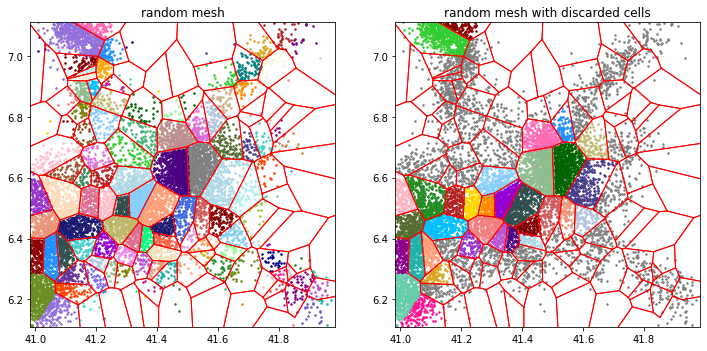

In [17]:
# left figure
a, translocations = preset_analyzer(True)
a.tesseller = tesseller.TessellerPlugin('random')
assignment_a = a.sampler.sample(translocations)

# right figure
b = preset_analyzer()
b.tesseller = tesseller.TessellerPlugin('random')

b.sampler = sampler.VoronoiSampler()
b.sampler.min_location_count = 100

assignment_b = b.sampler.sample(translocations)

# plot
_, axes = plt.subplots(1, 2, figsize=(12, 6))
a.tesseller.mpl.plot(assignment_a, axes=axes[0], title='random mesh',
                     location_options=dict(color=None, size=3, alpha=1))
b.tesseller.mpl.plot(assignment_b, axes=axes[1], title='random mesh with discarded cells',
                     location_options=dict(color=None, size=3, alpha=1))

The locations in gray pertain to discarded Voronoi cells.

Another approach to controlling the minimum number of points per bin consists in dynamically resizing the bins to assign additional points taken to number bins.
In this case, the bins overlap.

The `sampler.Knn` sampler initially operates just like `sampler.VoronoiSampler` and then selectively extend the bins that count too few data points.

In [19]:
a, translocations = preset_analyzer(True)
a.tesseller = tesseller.from_plugin('random')

a.sampler = sampler.Knn(100)

assignment = a.sampler.sample(translocations)

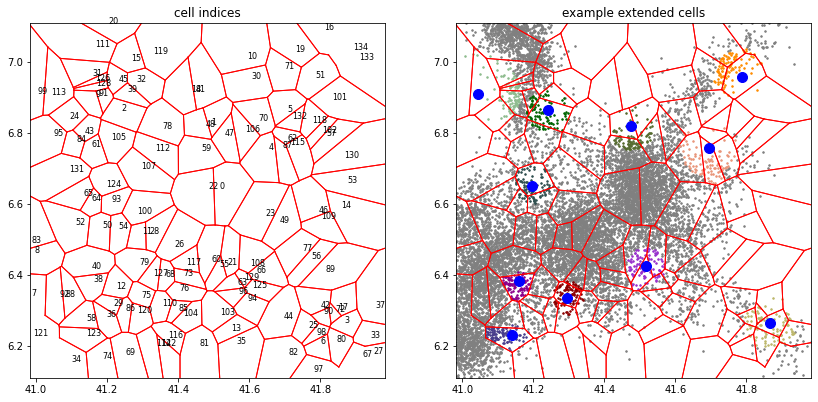

In [20]:
tessellation = assignment.tessellation

# deactivate all Voronoi cells
tessellation.cell_label = np.zeros(tessellation.number_of_cells, dtype=bool)

# activate a few Voronoi cells
example_cell_indices = [2, 3, 38, 48, 51, 55, 75, 87, 113, 123, 124]
tessellation.cell_label[example_cell_indices] = True

# update the assignment
kwargs = assignment.param['partition']
assignment.cell_index = tessellation.cell_index(translocations[['x','y']], **kwargs)

# plot
_, axes = plt.subplots(1, 2, figsize=(14, 7))
a.tesseller.mpl.plot_cell_indices(assignment, axes=axes[0], title='cell indices',
                                  fontsize=8)
a.tesseller.mpl.plot(assignment, axes=axes[1], title='example extended cells',
                     location_options=dict(color=None, size=3, alpha=1))
centroids = tessellation.cell_centers[example_cell_indices]
axes[1].plot(centroids[:,0], centroids[:,1], 'bo', markersize=10);

### Data structures

The object returned by the `sample` method stores the SPT data (`points`), the segmentation (`tessellation`) and the assignment of the data points to the bins (`cell_index`):

In [21]:
assignment = assignment_a
print(assignment)

tessellation:    <class 'tramway.tessellation.random.RandomMesh'>
points:          <class 'pandas.core.frame.DataFrame'>
cell_index:      <class 'numpy.ndarray'>
location_count:  <class 'numpy.ndarray'>
number_of_cells: 135
bounding_box:              n        x       y       t      dx      dy    dt
                 min     3.0  40.9835  6.1101   20.48 -0.5226 -0.5081  0.04
                 max  1856.0  41.9829  7.1098  795.04  0.5025  0.5157  0.04
@tessellation:   min_distance:       0.061511017201744324
                 avg_distance:       0.1537775430043608
                 max_distance:       None
                 min_probability:    0.001653302471687195
                 avg_probability:    0.00661320988674878
                 max_probability:    None
                 ref_distance:       0.0768887715021804
@partition:      min_location_count: 0


Attributes under `@tessellation` are sets of arguments passed to the segmentation method.

A temporal segmentation is also keyworded *tessellation*:

In [22]:
a, translocations = preset_analyzer(True)
a.time = time.SlidingWindow(duration=60)
time_assignment = a.sampler.sample(translocations)

In [23]:
print(time_assignment)

tessellation:    <class 'tramway.tessellation.window.SlidingWindow'>
points:          <class 'pandas.core.frame.DataFrame'>
cell_index:      <class 'tuple'>
location_count:  None
number_of_cells: 13
bounding_box:    None
@partition:      min_location_count: 0


The temporal segmentation alone has little interest for the common use cases **TRamWAy** was designed for.
As a consequence, the `time` attribute always come as an additional dimension once the spatial segmentation is defined, and it handles the additional boilerplate for distinguishing the spatial component of the overall segmentation.

In [24]:
print(a.time.get_spatial_segmentation(time_assignment))

None


In [25]:
a.tesseller = tessellers.KMeans
spatiotemporal_assignment = a.sampler.sample(translocations)

In [26]:
a.time.get_spatial_segmentation(spatiotemporal_assignment)